In [88]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [89]:
#UPLOAD MY DATASET - SALES DATA SAMPLE
df_sales_data_sample = pd.read_csv(r"C:\DSML bootcamp\Week3\Project\sales_data_sample.csv")

This dataset contains over 2,800 sales records, detailing various transactions. It includes information on the quantity and price of products sold, the sales amount, and the time of the sale. The data also provides details about the customers and their locations.

## OPEN QUESTION - WHAT IMPACT SALES?

### Data Cleaning

In [90]:
# Display the first 5 rows of the sales data
df_sales_data_sample.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [91]:
# Get the dimensions of the sales data (number of rows and columns)
df_sales_data_sample.shape

(2823, 25)

In [92]:
# Display a summary of the sales data, including the data types and non-null counts
df_sales_data_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [93]:
# Checks to see if there are columns with NaN and NaT values and returns a boolean True if they exist
df_sales_data_sample.isnull().sum() 

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [94]:
# Count the number of duplicate rows in the sales data
df_sales_data_sample.duplicated().sum()

np.int64(0)

In [95]:
# Counts how many duplicate rows exist in the 'PRODUCTCODE' column of the dataframe.
df_sales_data_sample.duplicated(["PRODUCTCODE"]).sum()

np.int64(2714)

In [96]:
# Check for duplicates in the 'ordernumber' key column - should be unique
duplicate_ordernumber = df_sales_data_sample["ORDERNUMBER"].duplicated().sum()
print(f"Number of duplicate ordernumber: {duplicate_ordernumber}")

Number of duplicate ordernumber: 2516


In [97]:
# Check for columns are correctly typed 
df_sales_data_sample.dtypes

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

In [98]:
#Check for unique values per column (helps identify which columns are likely categorical)
df_sales_data_sample.nunique()

ORDERNUMBER          307
QUANTITYORDERED       58
PRICEEACH           1016
ORDERLINENUMBER       18
SALES               2763
ORDERDATE            252
STATUS                 6
QTR_ID                 4
MONTH_ID              12
YEAR_ID                3
PRODUCTLINE            7
MSRP                  80
PRODUCTCODE          109
CUSTOMERNAME          92
PHONE                 91
ADDRESSLINE1          92
ADDRESSLINE2           9
CITY                  73
STATE                 16
POSTALCODE            73
COUNTRY               19
TERRITORY              3
CONTACTLASTNAME       77
CONTACTFIRSTNAME      72
DEALSIZE               3
dtype: int64

In [99]:
#Check for invalid or extreme values
df_sales_data_sample.describe(include="all")

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823,2823,2823.000000,2823.000000,2823.00000,...,2823,302,2823,1337,2747,2823,1749,2823,2823,2823
unique,NaN,NaN,NaN,NaN,NaN,252,6,NaN,NaN,NaN,...,92,9,73,16,73,19,3,77,72,3
top,NaN,NaN,NaN,NaN,NaN,11/14/2003 0:00,Shipped,NaN,NaN,NaN,...,"C/ Moralzarzal, 86",Level 3,Madrid,CA,28034,USA,EMEA,Freyre,Diego,Medium
freq,NaN,NaN,NaN,NaN,NaN,38,2617,NaN,NaN,NaN,...,259,55,304,416,259,1004,1407,259,259,1384
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,NaN,NaN,2.717676,7.092455,2003.81509,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,92.085478,9.741443,20.174277,4.225841,1841.865106,NaN,NaN,1.203878,3.656633,0.69967,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,10100.000000,6.000000,26.880000,1.000000,482.130000,NaN,NaN,1.000000,1.000000,2003.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,NaN,NaN,2.000000,4.000000,2003.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,NaN,NaN,3.000000,8.000000,2004.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,NaN,NaN,4.000000,11.000000,2004.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### OBSERVATIONS 
- This dataset doesn't have key values 
- Each ordernumber can have different productcode (for each order, they bought different products)

#### SUBSET TABLE

What fators impact sales?
* SALES = QUANTITYORDERED * PRICEEACH.
- Geographical factors = city, country, sales  (top 10 /bottom 10 cities with highest sales)
- Temporal factors = month id, qrt id, sales (cyclical pattern of sales)
- Product line = productline , sales

In [100]:
# Drop unnecessary columns
sales_data_clean =df_sales_data_sample[['ORDERNUMBER','PRODUCTCODE','QUANTITYORDERED','SALES','CITY','COUNTRY','MONTH_ID','QTR_ID','PRODUCTLINE']]

In [101]:
# Display new table with only selected columns
sales_data_clean

,ORDERNUMBER,PRODUCTCODE,QUANTITYORDERED,SALES,CITY,COUNTRY,MONTH_ID,QTR_ID,PRODUCTLINE
0,10107,S10_1678,30,2871.00,NYC,USA,2,1,Motorcycles
1,10121,S10_1678,34,2765.90,Reims,France,5,2,Motorcycles
2,10134,S10_1678,41,3884.34,Paris,France,7,3,Motorcycles
3,10145,S10_1678,45,3746.70,Pasadena,USA,8,3,Motorcycles
4,10159,S10_1678,49,5205.27,San Francisco,USA,10,4,Motorcycles
...,...,...,...,...,...,...,...,...,...
2818,10350,S72_3212,20,2244.40,Madrid,Spain,12,4,Ships
2819,10373,S72_3212,29,3978.51,Oulu,Finland,1,1,Ships
2820,10386,S72_3212,43,5417.57,Madrid,Spain,3,1,Ships
2821,10397,S72_3212,34,2116.16,Toulouse,France,3,1,Ships


In [102]:
# Handle missing values
sales_data_clean.isnull().sum() 

ORDERNUMBER        0
PRODUCTCODE        0
QUANTITYORDERED    0
SALES              0
CITY               0
COUNTRY            0
MONTH_ID           0
QTR_ID             0
PRODUCTLINE        0
dtype: int64

In [103]:
# Handle duplicates
sales_data_clean.duplicated().sum() 

np.int64(0)

### [EDA]

##### Variable types

In [104]:
# Displays the data type of each column in the 'sales_data_clean' DataFrame.
print(sales_data_clean.dtypes)

ORDERNUMBER          int64
PRODUCTCODE         object
QUANTITYORDERED      int64
SALES              float64
CITY                object
COUNTRY             object
MONTH_ID             int64
QTR_ID               int64
PRODUCTLINE         object
dtype: object


##### Univariate EDA

<Axes: title={'center': 'Distribution of Quantity Ordered'}, xlabel='QUANTITYORDERED', ylabel='Count'>

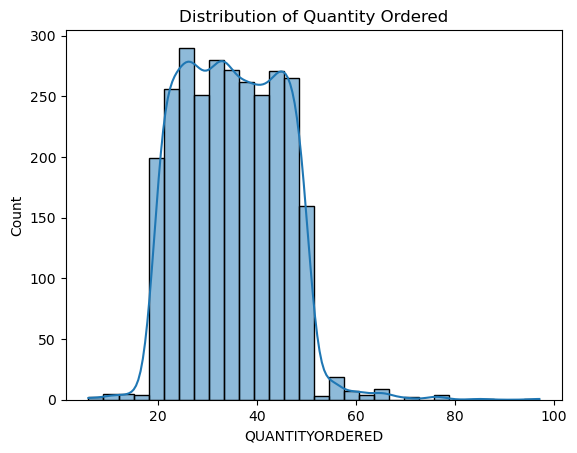

In [105]:
# Gets descriptive statistics (count, mean, std, min, etc.) for the 'QUANTITYORDERED' column and resets the index.
quantity_ordered_counts = sales_data_clean['QUANTITYORDERED'].describe().reset_index()

# Sets the title for the histogram plot.
plt.title('Distribution of Quantity Ordered')

# Plots a histogram of the 'QUANTITYORDERED' values with 30 bins and a KDE (smoothed curve) overlay.
sns.histplot(sales_data_clean['QUANTITYORDERED'], bins=30, kde=True)

**Insights:**
- Most customer orders range between 20 and 50 units, with a peak around 30 to 35 units. Very few orders exceed 70 units, showing that large quantity purchases are rare.

<Axes: title={'center': 'Distribution of Sales'}, xlabel='SALES', ylabel='Count'>

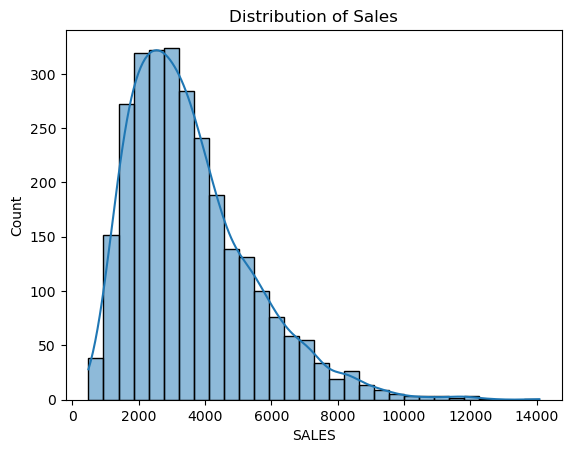

In [106]:
# Calculates summary statistics (count, mean, std, min, percentiles, max) for the 'SALES' column and resets the index.
sales_counts = sales_data_clean['SALES'].describe().reset_index()

# Sets the title of the plot to indicate it's showing the distribution of sales.
plt.title('Distribution of Sales')

# Plots a histogram of the 'SALES' column with 30 bins and a KDE (Kernel Density Estimate) curve to show the distribution shape.
sns.histplot(sales_data_clean['SALES'], bins=30, kde=True)

**Insights:**
- Most sales amounts fall between 1,000 and 5,000, with a peak around 2,500. Higher sales above 6,000 are much less frequent. Higher sales values are less common, creating a long tail on the right side of the distribution.

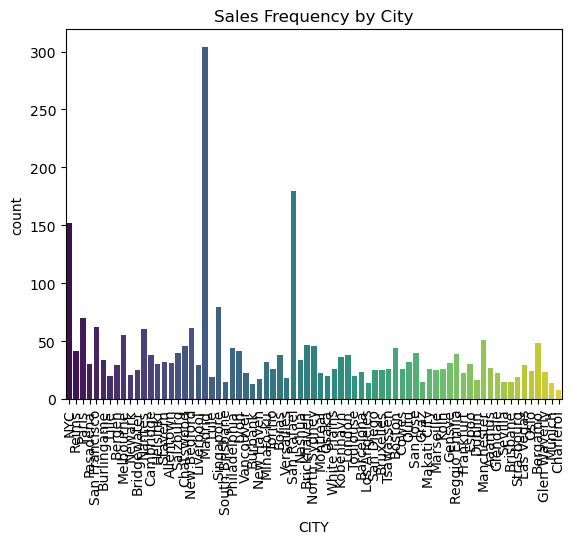

In [107]:
# Counts the occurrences of each unique city in the 'CITY' column and resets the index to create a DataFrame.
city_counts = sales_data_clean['CITY'].value_counts().reset_index()

# Creates a count plot showing the number of sales per city.
sns.countplot(
    x="CITY",                # X-axis: City names
    data=sales_data_clean,   # Data source
    palette='viridis',       # Color palette
    hue="CITY",              # Adds color differentiation by city (redundant in this case, since x = CITY)
    legend=False             # Hides the legend
)

# Rotates the x-axis labels 90 degrees for better readability.
plt.xticks(rotation=90)

# Adds a title to the plot.
plt.title('Sales Frequency by City')

# Displays the plot.
plt.show()

**Insights:**
- We can see in this graph that everything is collapsed and not readable, so I decided to split the graph into two.

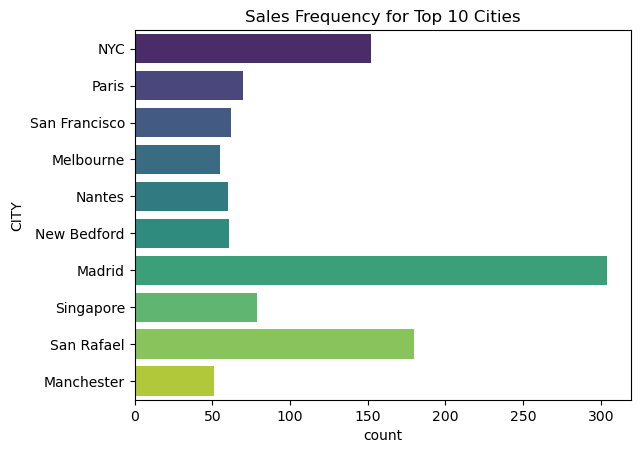

In [108]:
# Determine the number of top cities you want to plot
top_n = 10

# Get the top N city names
top_cities = sales_data_clean['CITY'].value_counts().nlargest(top_n).index

# Filter the data for only those cities
filtered_data = sales_data_clean[sales_data_clean['CITY'].isin(top_cities)]

# Plot
sns.countplot(
    y="CITY",  # using y to make it horizontal
    data=filtered_data,
    palette='viridis',
    hue = "CITY", 
    legend=False
)
plt.xticks(rotation=0)  # No rotation needed for horizontal plot
plt.title('Sales Frequency for Top 10 Cities')
plt.show()

**Insights:**
- The chart shows that Madrid, New york and San Rafael have the highest number of sales transactions among the top 10 cities. This contrasts with other top-selling cities like Manchester and Paris, which have a much lower frequency of transactions.

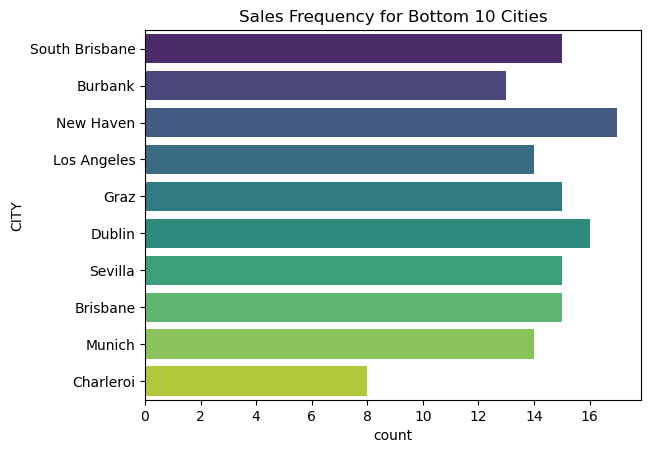

In [109]:
# Determine the number of bottom cities you want to plot
bottom_n = 10

# Get the bottom N city names
bottom_cities = sales_data_clean['CITY'].value_counts().nsmallest(bottom_n).index

# Filter the data for only those cities
filtered_data = sales_data_clean[sales_data_clean['CITY'].isin(bottom_cities)]

# Plot
sns.countplot(
    y="CITY",  # using y to make it horizontal
    data=filtered_data,
    palette='viridis',
    hue = "CITY", 
    legend=False
)
plt.xticks(rotation=0)  # No rotation needed for horizontal plot
plt.title('Sales Frequency for Bottom 10 Cities')
plt.show()

**Insights:**
- The graph reveals that Charleroi has the lowest count among the bottom 10 cities, followed closely by Munich and Brisbane, indicating minimal activity or presence in the dataset. Overall, the differences among these cities are relatively small, with all counts ranging between approximately 8 and 17.

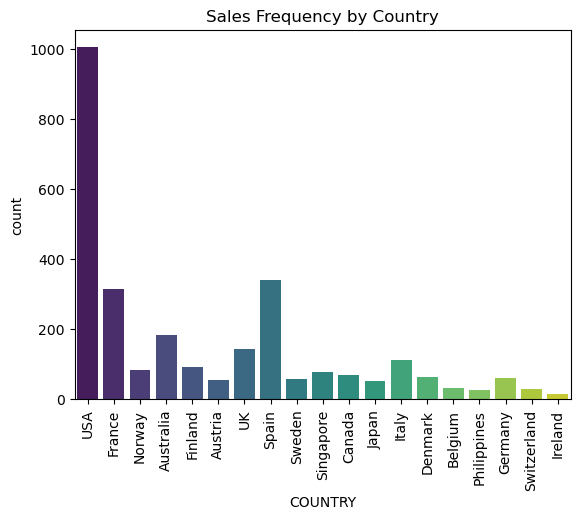

In [110]:
# Counts the number of occurrences of each country in the 'COUNTRY' column and resets the index to create a DataFrame.
country_counts = sales_data_clean['COUNTRY'].value_counts().reset_index()

# Creates a count plot showing the number of sales per country.
sns.countplot(
    x="COUNTRY",             # X-axis: Country names
    data=sales_data_clean,   # Data source
    palette='viridis',       # Color palette
    hue="COUNTRY",           # Adds color differentiation by country (redundant here)
    legend=False             # Hides the legend
)

# Rotates the x-axis labels for better readability.
plt.xticks(rotation=90)

# Adds a title to the plot.
plt.title('Sales Frequency by Country')

# Displays the plot.
plt.show()

**Insights:**
- The graph shows that the USA overwhelmingly dominates the dataset with over 1,000 records, far exceeding all other countries. In contrast, countries like Ireland, Switzerland, and New Zealand have very few entries, showing much lower representation in the data.


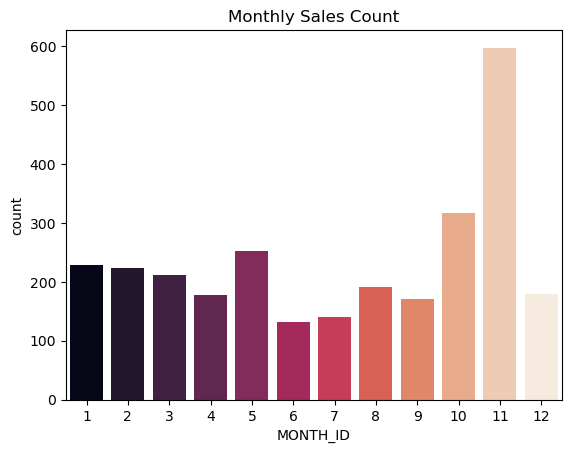

In [111]:
# Generates summary statistics (count, mean, std, min, percentiles, max) for the 'MONTH_ID' column and resets the index.
month_id_counts = sales_data_clean['MONTH_ID'].describe().reset_index()

# Creates a count plot showing how many sales occurred in each month.
sns.countplot(
    x="MONTH_ID",             # X-axis: Month identifiers (e.g., 1–12)
    data=sales_data_clean,    # Data source
    palette='rocket',         # Color palette
    hue="MONTH_ID",           # Adds color per bar (redundant here since x = MONTH_ID)
    legend=False              # Hides the legend
)

# Adds a title to the plot.
plt.title('Monthly Sales Count')

# Displays the plot.
plt.show()

**Insights:**
- The number of sales varies throughout the year, with a noticeable peak in November. This suggests that November is the busiest sales month, possibly due to seasonal events or promotions.

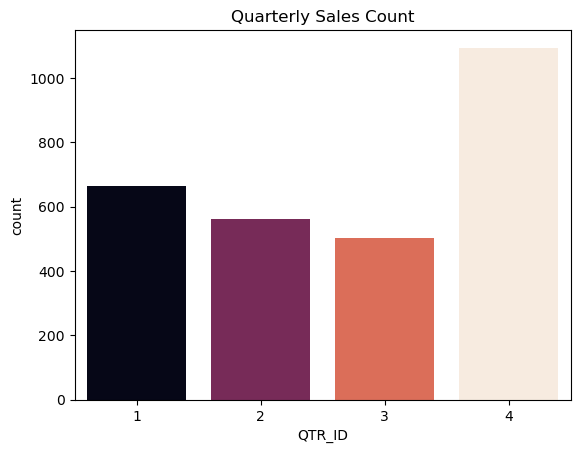

In [112]:
# Computes summary statistics (count, mean, std, min, percentiles, max) for the 'QTR_ID' column and resets the index.
qtr_id_counts = sales_data_clean['QTR_ID'].describe().reset_index()

# Creates a count plot showing the number of sales for each quarter.
sns.countplot(
    x="QTR_ID",              # X-axis: Quarter IDs (typically values 1–4)
    data=sales_data_clean,   # Data source
    palette='rocket',        # Color palette
    hue="QTR_ID",            # Adds color per bar (redundant here since x = QTR_ID)
    legend=False             # Hides the legend
)

# Adds a title to the plot.
plt.title('Quarterly Sales Count')

# Displays the plot.
plt.show()

**Insights:**
- Sales are highest in the fourth quarter of the year, significantly surpassing the other quarters. This indicates a strong seasonal trend, likely influenced by year-end shopping and holiday activity.

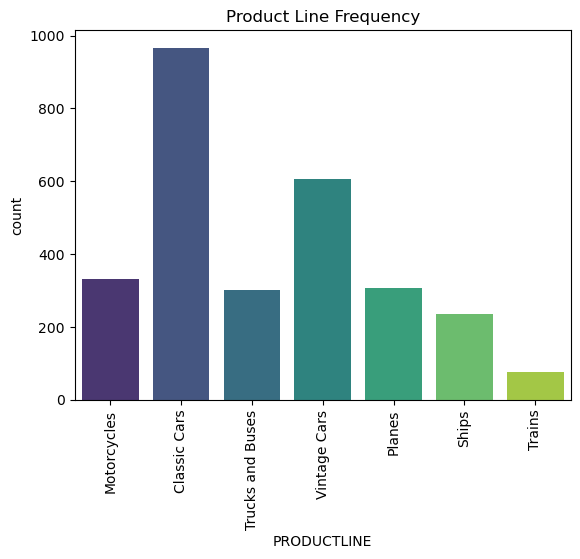

In [113]:
# Counts the number of occurrences of each product line and resets the index to create a DataFrame.
productline_counts = sales_data_clean['PRODUCTLINE'].value_counts().reset_index()

# Creates a count plot showing how many sales entries exist for each product line.
sns.countplot(
    x="PRODUCTLINE",             # X-axis: Product line categories
    data=sales_data_clean,       # Data source
    palette='viridis',           # Color palette
    hue="PRODUCTLINE",           # Adds color per bar (redundant since x = PRODUCTLINE)
    legend=False                 # Hides the legend
)

# Rotates the x-axis labels for better readability.
plt.xticks(rotation=90)

# Adds a title to the plot.
plt.title('Product Line Frequency')

# Displays the plot.
plt.show()

**Insights:**
- Classic Cars is the most sold product line by far, followed by Vintage Cars and Trucks and Buses. Trains have the lowest sales, indicating a limited demand compared to other categories.

##### Bivariate EDA

STUDY RELATIONSHIP OF THE VARIABLE (CITY-COUNTRY-MONTH_ID-QTR_ID-PRODUCTLINE) WITH SALES

In [114]:
#This function will give the total sales per each variable
grouped = sales_data_clean.groupby(['PRODUCTLINE', 'COUNTRY', 'CITY', 'MONTH_ID', 'QTR_ID'])['SALES'].sum().reset_index() 
grouped

,PRODUCTLINE,COUNTRY,CITY,MONTH_ID,QTR_ID,SALES
0,Classic Cars,Australia,Chatswood,5,2,23425.66
1,Classic Cars,Australia,Chatswood,7,3,13255.47
2,Classic Cars,Australia,Glen Waverly,7,3,12334.82
3,Classic Cars,Australia,Glen Waverly,11,4,1906.50
4,Classic Cars,Australia,Melbourne,11,4,50697.09
...,...,...,...,...,...,...
613,Vintage Cars,USA,San Rafael,8,3,19229.39
614,Vintage Cars,USA,San Rafael,10,4,47269.94
615,Vintage Cars,USA,San Rafael,11,4,29402.51
616,Vintage Cars,USA,San Rafael,12,4,14795.76


In [115]:
# This creates a table that counts how often each SALES value appears for each PRODUCTLINE
crosstab_result = pd.crosstab(sales_data_clean['PRODUCTLINE'], sales_data_clean['SALES'])
crosstab_result

SALES,482.13,541.14,553.95,577.60,640.05,651.80,652.35,683.80,694.60,703.60,...,10993.50,11279.20,11336.70,11623.70,11739.70,11886.60,11887.80,12001.00,12536.50,14082.80
PRODUCTLINE,,,,,,,,,,,,,,,,,,,,,
Classic Cars,0,0,0,0,1,0,0,0,0,0,...,1,1,0,1,1,0,1,1,0,0
Motorcycles,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
Planes,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Ships,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Trains,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Trucks and Buses,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Vintage Cars,0,1,1,1,0,0,1,1,1,1,...,0,0,1,0,0,0,0,0,1,1


In [116]:
# Returns an array of unique values found in the 'PRODUCTLINE' column of the DataFrame.
df_sales_data_sample["PRODUCTLINE"].unique()

array(['Motorcycles', 'Classic Cars', 'Trucks and Buses', 'Vintage Cars',
       'Planes', 'Ships', 'Trains'], dtype=object)

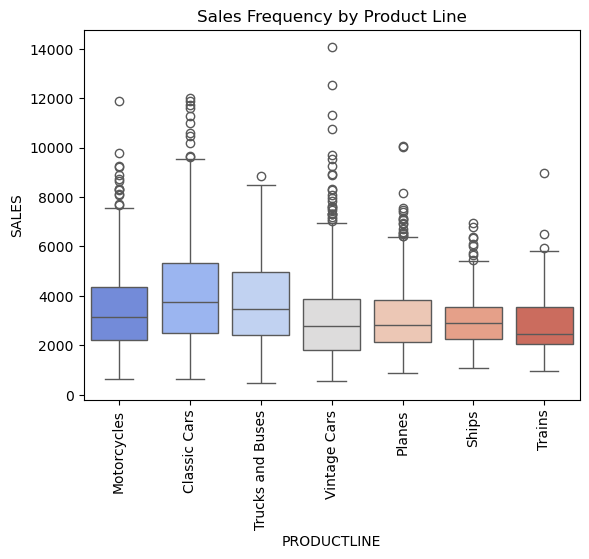

In [117]:
# Creates a boxplot to visualize the distribution of 'SALES' for each 'PRODUCTLINE'.
sns.boxplot(
    data=sales_data_clean,       # Data source
    x="PRODUCTLINE",             # Categories on the x-axis
    y="SALES",                   # Numerical values on the y-axis
    palette="coolwarm",          # Color palette for the boxes
    hue="PRODUCTLINE",           # Adds color by product line (redundant here since x = PRODUCTLINE)
    legend=False                 # Hides the legend
)

# Rotates x-axis labels 90 degrees for readability.
plt.xticks(rotation=90)

# Sets the plot title.
plt.title('Sales Frequency by Product Line')

# Displays the plot.
plt.show()

**Insights:**
- Classic cars has the highest average amount of sales where as trains has the least average amount of sales.

In [118]:
# This creates a table that counts how often each SALES value appears for each country
crosstab_result1 = pd.crosstab(sales_data_clean['COUNTRY'], sales_data_clean['SALES'])
crosstab_result1

SALES,482.13,541.14,553.95,577.60,640.05,651.80,652.35,683.80,694.60,703.60,...,10993.50,11279.20,11336.70,11623.70,11739.70,11886.60,11887.80,12001.00,12536.50,14082.80
COUNTRY,,,,,,,,,,,,,,,,,,,,,
Australia,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Austria,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Belgium,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Canada,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Denmark,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Finland,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
France,1,0,0,0,0,0,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0
Germany,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Ireland,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


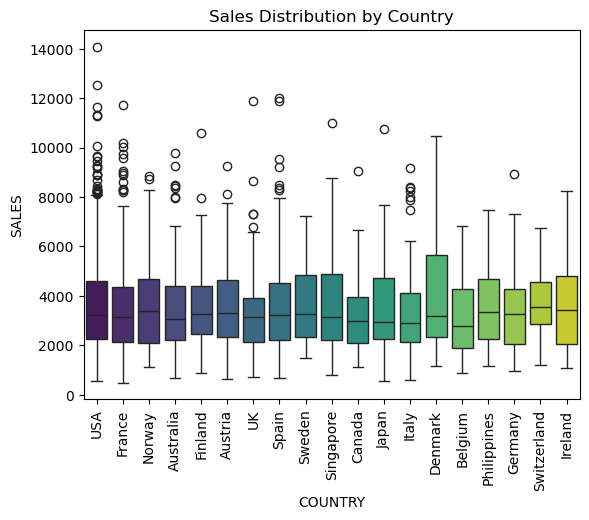

In [119]:
# Creates a boxplot to show the distribution of 'SALES' values grouped by 'COUNTRY'.
sns.boxplot(
    data=sales_data_clean,       # Data source
    x="COUNTRY",                 # Categories on the x-axis
    y="SALES",                   # Numerical variable on the y-axis
    palette="viridis",           # Color palette for the boxes
    hue="COUNTRY",               # Adds color by country (redundant here since x = COUNTRY)
    legend=False                 # Hides the legend
)

# Rotates x-axis labels by 90 degrees for better readability.
plt.xticks(rotation=90)

# Sets the plot title.
plt.title('Sales Distribution by Country')

# Displays the plot.
plt.show()

**Insights:**
- The boxplot reveals two distinct sales patterns: while countries like the USA, France, and Norway exhibit a wide range of sales with numerous high-value transactions (outliers), countries such as Denmark, Philippines, and Switzerland show a tighter distribution, indicating a more consistent and lower range of sales.

In [120]:
# This creates a table that counts how often each SALES value appears for each CITY
crosstab_result2 = pd.crosstab(sales_data_clean['CITY'], sales_data_clean['SALES'])
crosstab_result2

SALES,482.13,541.14,553.95,577.60,640.05,651.80,652.35,683.80,694.60,703.60,...,10993.50,11279.20,11336.70,11623.70,11739.70,11886.60,11887.80,12001.00,12536.50,14082.80
CITY,,,,,,,,,,,,,,,,,,,,,
Aaarhus,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Allentown,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Barcelona,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bergamo,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bergen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Toulouse,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Tsawassen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Vancouver,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


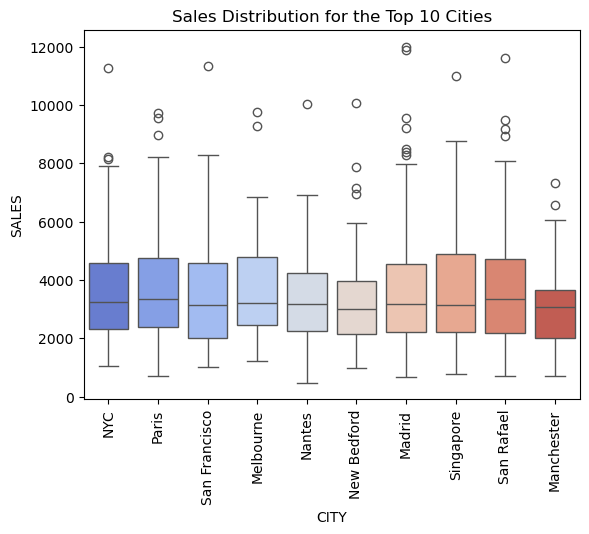

In [121]:
# Set the number of top cities to include in the plot
top_n = 10

# Identify the top N cities with the highest number of sales records
top_cities = sales_data_clean['CITY'].value_counts().nlargest(top_n).index

# Filter the original data to include only sales from the top N cities
filtered_data = sales_data_clean[sales_data_clean['CITY'].isin(top_cities)]

# Create a boxplot showing the distribution of sales for these top cities
sns.boxplot(
    data=filtered_data,          # Filtered dataset with only top cities
    x="CITY",                   # Categories on x-axis (top cities)
    y="SALES",                  # Sales amounts on y-axis
    palette="coolwarm",          # Color palette for boxes
    hue="CITY",                 # Adds color by city (redundant since x= CITY)
    legend=False                # Hide the legend
)

# Rotate x-axis labels 90 degrees for readability
plt.xticks(rotation=90)

# Add title to the plot
plt.title('Sales Distribution for the Top 10 Cities')

# Show the plot
plt.show()

**Insights:**
- The boxplot shows that cities like NYC, Paris, and San Francisco generally have higher median sales and a wider distribution of high-value transactions. In contrast, cities such as San Rafael and Manchester exhibit a more concentrated distribution of lower sales values, with fewer high-value outliers.

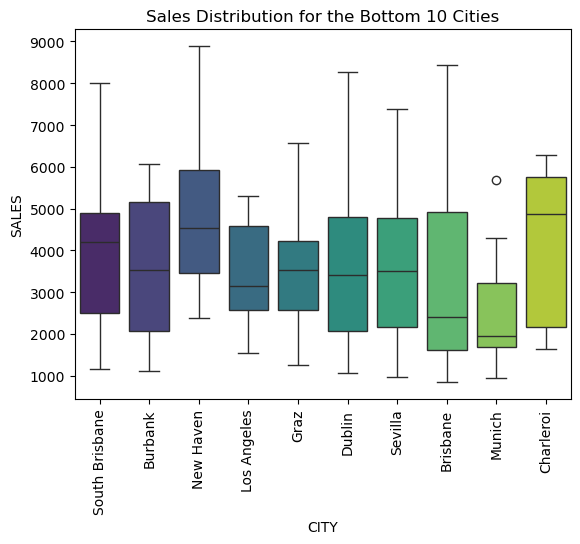

In [122]:
# Set the number of bottom cities to include in the plot
bottom_n = 10

# Identify the bottom N cities with the fewest sales records
bottom_cities = sales_data_clean['CITY'].value_counts().nsmallest(bottom_n).index

# Filter the dataset to include only sales from these bottom cities
filtered_data = sales_data_clean[sales_data_clean['CITY'].isin(bottom_cities)]

# Create a boxplot showing the sales distribution for the bottom N cities
sns.boxplot(
    data=filtered_data,           # Filtered data with bottom cities
    x="CITY",                    # Categories on the x-axis (bottom cities)
    y="SALES",                   # Numerical sales values on the y-axis
    palette="viridis",           # Color palette for the boxes
    hue="CITY",                  # Color by city (redundant here since x = CITY)
    legend=False                 # Hides the legend
)

# Rotate x-axis labels 90 degrees for better readability
plt.xticks(rotation=90)

# Adds title to the plot
plt.title('Sales Distribution for the Bottom 10 Cities')

# Displays the plot
plt.show()

**Insights:**
- The chart shows that while most of these cities have a similar sales range, cities like South Brisbane, Burbank, and New Haven generally have higher sales. In contrast, Munich has consistently lower sales, and Charleroi stands out with a higher sales average compared to the others in this group

In [123]:
# This creates a table that counts how often each SALES value appears for each MOTH_ID
crosstab_result3 = pd.crosstab(sales_data_clean['MONTH_ID'], sales_data_clean['SALES'])
crosstab_result3

SALES,482.13,541.14,553.95,577.60,640.05,651.80,652.35,683.80,694.60,703.60,...,10993.50,11279.20,11336.70,11623.70,11739.70,11886.60,11887.80,12001.00,12536.50,14082.80
MONTH_ID,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1
5,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
6,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


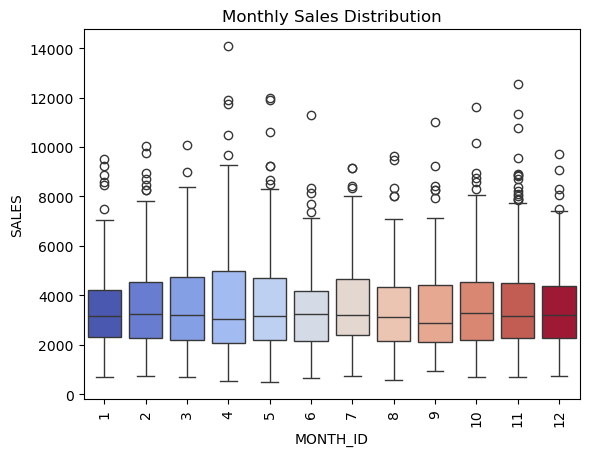

In [124]:
# Creates a boxplot showing the distribution of 'SALES' grouped by each month ('MONTH_ID').
sns.boxplot(
    data=sales_data_clean,      # Dataset
    x="MONTH_ID",               # Categories on x-axis (month numbers)
    y="SALES",                  # Sales values on y-axis
    palette="coolwarm",         # Color palette for the boxes
    hue="MONTH_ID",             # Adds color per month (redundant since x = MONTH_ID)
    legend=False                # Hides the legend
)

# Rotates x-axis labels 90 degrees for readability.
plt.xticks(rotation=90)

# Sets the plot title.
plt.title('Monthly Sales Distribution')

# Displays the plot.
plt.show()

**Insights:**
-  The chart shows that sales performance is consistent throughout the year, with a similar distribution and range of sales values from month to month. However, there is a slight upward trend in median sales during the early part of the year, from January to May, after which the sales values tend to flatten out.

In [125]:
# This creates a table that counts how often each SALES value appears for each QTR_ID
crosstab_result4 = pd.crosstab(sales_data_clean['QTR_ID'], sales_data_clean['SALES'])
crosstab_result4

SALES,482.13,541.14,553.95,577.60,640.05,651.80,652.35,683.80,694.60,703.60,...,10993.50,11279.20,11336.70,11623.70,11739.70,11886.60,11887.80,12001.00,12536.50,14082.80
QTR_ID,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,1,1,1,0,0,0,...,0,1,0,0,1,1,1,1,0,1
3,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,1,...,0,0,1,1,0,0,0,0,1,0


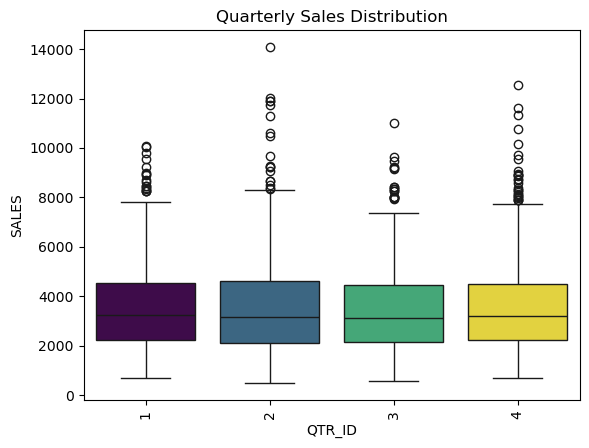

In [126]:
# Creates a boxplot showing the distribution of 'SALES' grouped by each quarter ('QTR_ID').
sns.boxplot(
    data=sales_data_clean,      # Dataset to plot
    x="QTR_ID",                 # Categories on x-axis (quarter numbers)
    y="SALES",                  # Numerical sales values on y-axis
    palette="viridis",          # Color palette for the boxes
    hue="QTR_ID",               # Adds color per quarter (redundant since x = QTR_ID)
    legend=False                # Hides the legend
)

# Rotates x-axis labels 90 degrees for readability.
plt.xticks(rotation=90)

# Adds a title to the plot.
plt.title('Quarterly Sales Distribution')

# Displays the plot.
plt.show()

**Insights:**
- The boxplot shows that sales performance is very similar across all four quarters of the year, with little variation in the median sales. However, the second and fourth quarters appear to have a slightly wider range of sales values and more instances of high-value sales (outliers) compared to the first and third quarters.